In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')

In [2]:
POS_CASH_balance= dd.read_csv("./data/POS_CASH_balance.csv")
a = POS_CASH_balance.shape
print("POS_CASH_balance shape :({},{})".format( a[0].compute(),a[1]))

POS_CASH_balance shape :(10001358,8)


In [3]:
POS_CASH_balance.compute().dtypes.value_counts()

int64      5
float64    2
object     1
dtype: int64

<AxesSubplot:>

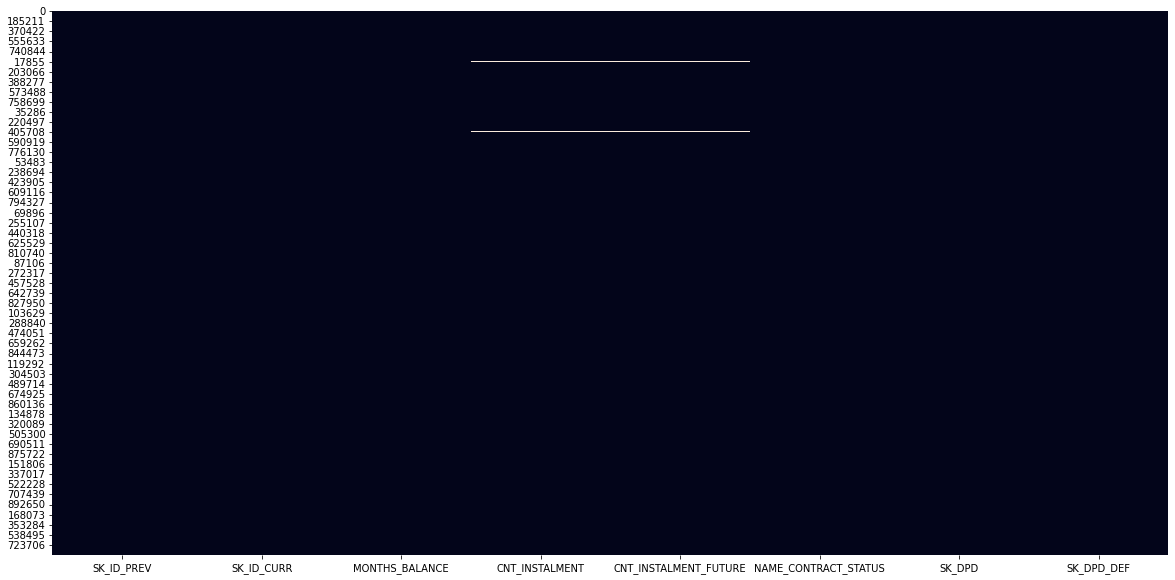

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(POS_CASH_balance.isna().compute(), cbar=False)

In [5]:
l=list(POS_CASH_balance.compute().select_dtypes('float').columns) + list(POS_CASH_balance.compute().select_dtypes('int').columns)

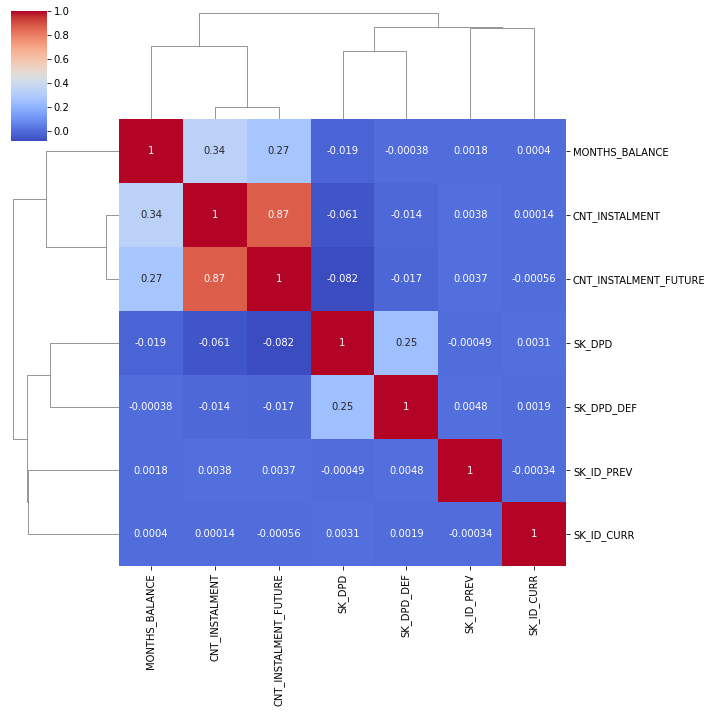

In [6]:
sns.clustermap(POS_CASH_balance[l].compute().corr(),annot=True,cmap='coolwarm')

In [7]:
POS_CASH_balance.compute().select_dtypes('object').columns

Index(['NAME_CONTRACT_STATUS'], dtype='object')

In [8]:
POS_CASH_balance.NAME_CONTRACT_STATUS.compute().value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [9]:
print("NAME_CONTRACT_STATUS colonne pas clair")

NAME_CONTRACT_STATUS colonne pas clair


In [10]:
print("remarque : Dans la phase de preparation des donnees on peut soustraire les deux colones : SK_DPD et SK_DPD_DEF")

remarque : Dans la phase de preparation des donnees on peut soustraire les deux colones : SK_DPD et SK_DPD_DEF


<AxesSubplot:>

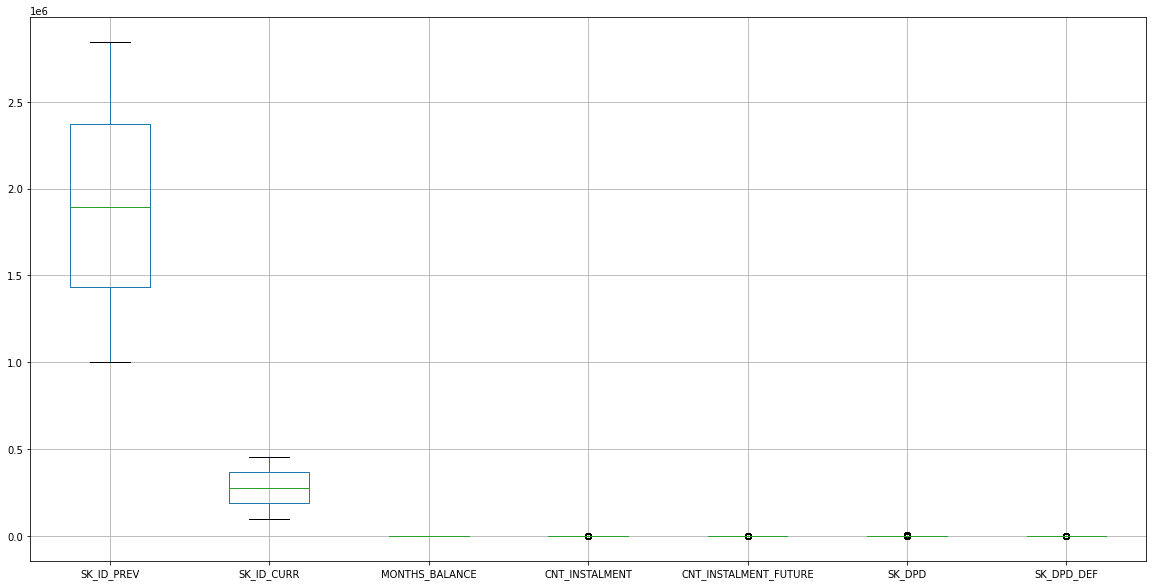

In [15]:
plt.figure(figsize=(20,10))
POS_CASH_balance.compute().boxplot()

In [16]:
POS_CASH_balance= pd.read_csv("./data/POS_CASH_balance.csv")

<AxesSubplot:>

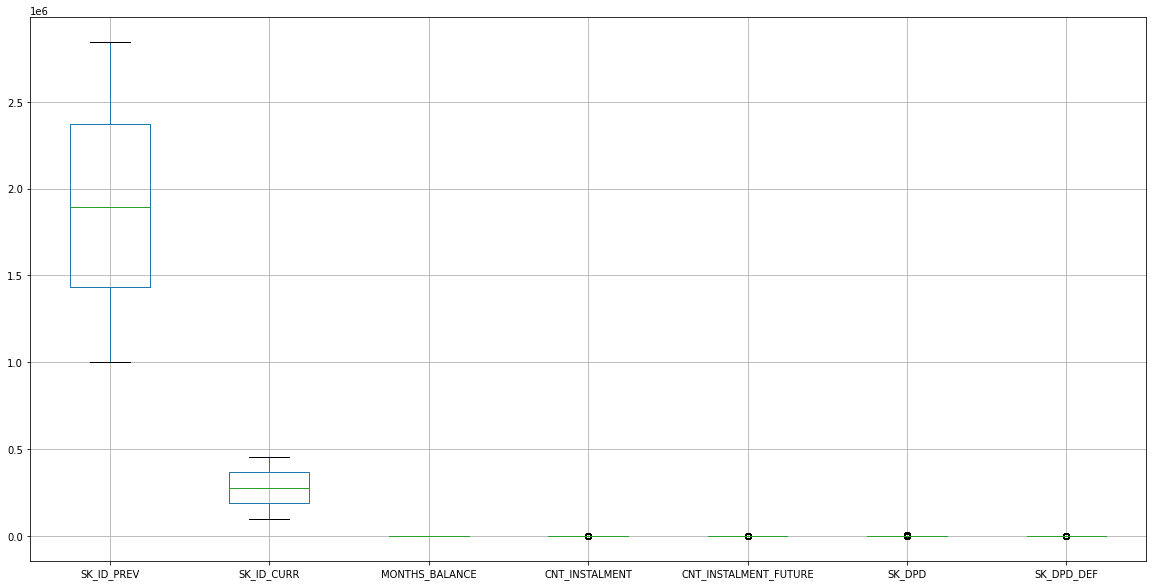

In [17]:
plt.figure(figsize=(20,10))
POS_CASH_balance.boxplot()

In [3]:
profile = ProfileReport(POS_CASH_balance.compute(), title="POS_CASH_balance Profiling Report")
profile.to_file("POS_CASH_balance.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 41.67it/s]
